In [1]:
# imports

import pandas as pd
import numpy as np
import wquantiles as wq
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels import robust
from pathlib import Path

In [2]:
# data import

DATA = Path().resolve() / 'data'
    
AIRLINE_STATS_CSV = DATA / 'airline_stats.csv'
KC_TAX_CSV = DATA / 'kc_tax.csv.gz'
LC_LOANS_CSV = DATA / 'lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA / 'dfw_airline.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA / 'sp500_sectors.csv'
STATE_CSV = DATA / 'state.csv'

CRIME_RATE = pd.read_csv(STATE_CSV)
AIRPORT_DELAY_CAUSES = pd.read_csv(AIRPORT_DELAYS_CSV)
SP500_DATA = pd.read_csv(SP500_DATA_CSV, index_col=0)
SP500_SECTORS = pd.read_csv(SP500_SECTORS_CSV)
KC_TAX = pd.read_csv(KC_TAX_CSV)
LC_LOANS = pd.read_csv(LC_LOANS_CSV)
AIRLINE_STATS = pd.read_csv(AIRLINE_STATS_CSV)


In [3]:
# functions

# central tendencies
def calculate_means(data_set, column_title, crime_rate_header=None):
    target_column = data_set[column_title]
    print("====== CENTRAL TENDENCIES ======")
    print(f"Mean: {target_column.mean():,}")
    print(f"20% Trimmed Mean: {stats.trim_mean(target_column, 0.2):,}")
    print(f"Median: {target_column.median():,}")
    if crime_rate_header:
        crime_rate_column = data_set[crime_rate_header]
        print(f"Crime Rate Weighted Mean: {np.average(crime_rate_column, weights=target_column)}")
        print(f"Crime Rate Weighted Median: {wq.median(crime_rate_column, weights=target_column)}")
    print("=========== END =========== \n")

# variance
def calculate_variance(data_set, column_title, crime_rate_header=None):
    target_column = data_set[column_title]
    print("====== VARIANCE ======")
    print(f"Standard Deviation: {target_column.std():,}")
    print(f"Interquartile Range: {target_column.quantile(0.75) - target_column.quantile(0.25):,}")
    print(f"Median Absolute Deviation: {stats.median_abs_deviation(target_column, nan_policy='omit'):,}")
    if crime_rate_header:
        crime_rate_column = data_set[crime_rate_header]
    print("=========== END =========== \n")

# distribution (includes data visualizations)
def calculate_distribution(data_set, column_title):
    target_column = data_set[column_title]
    print("====== DATA DISTRIBUTION ======")
    print(f"{column_title} Quantiles:\n{target_column.quantile([0.05, 0.25, 0.5, 0.75, 0.95])}")
    print("=========== END =========== \n")
    
def display_frequency_table(data_set, column_title):
    target_column = data_set[column_title]
    # cut function cuts the data into n equally spaced bins
    binned_population = pd.cut(target_column, 10)
    binned_count = binned_population.value_counts()
    display(binned_count)
    

In [4]:
display(CRIME_RATE)

calculate_means(CRIME_RATE, "Population", crime_rate_header="Murder.Rate")
calculate_variance(CRIME_RATE, "Population", crime_rate_header="Murder.Rate")
calculate_distribution(CRIME_RATE, "Murder.Rate")

# quick functions
CRIME_RATE.describe()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


====== CENTRAL TENDENCIES ======
Mean: 6,162,876.3
20% Trimmed Mean: 4,413,915.966666667
Median: 4,436,369.5
Crime Rate Weighted Mean: 4.445833981123393
Crime Rate Weighted Median: 4.4
=========== END =========== 

====== VARIANCE ======
Standard Deviation: 6,848,235.347401142
Interquartile Range: 4,847,308.0
Median Absolute Deviation: 2,596,702.0
=========== END =========== 

====== DATA DISTRIBUTION ======
Murder.Rate Quantiles:
0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64
=========== END =========== 



,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


In [5]:
display_frequency_table(CRIME_RATE, "Population")

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

# Visual Exploration of Data Distribution

<Axes: title={'center': 'Population by State: Boxplot'}>

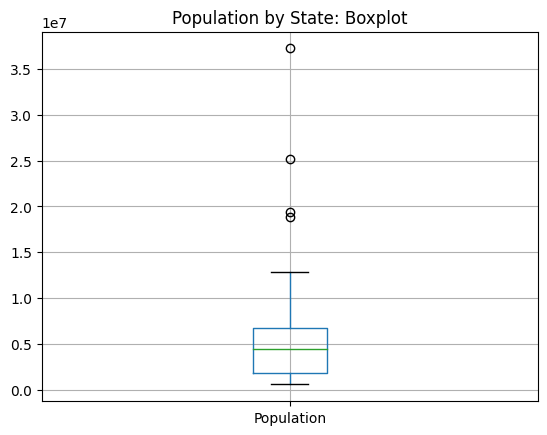

In [6]:
# display box plot of population per state

boxplot = CRIME_RATE.boxplot(column="Population")
boxplot.set_title("Population by State: Boxplot")
display(boxplot)

array([[<Axes: title={'center': 'Population by State: Histogram'}, xlabel='Population', ylabel='Count'>]],
      dtype=object)

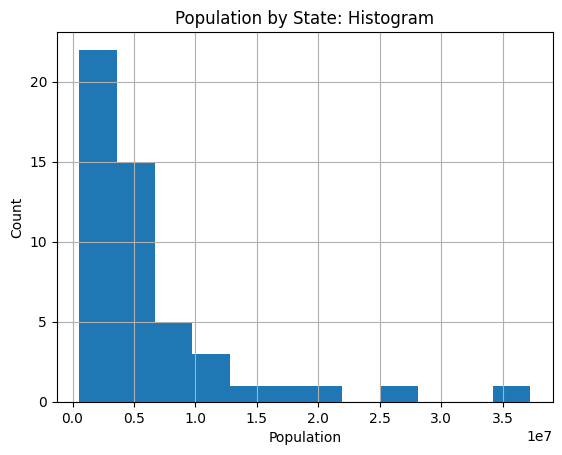

In [3]:
# display histogram of population per state
histogram = CRIME_RATE.hist(column="Population", bins=12)
histogram[0][0].set_title("Population by State: Histogram")
histogram[0][0].set_xlabel("Population")
histogram[0][0].set_ylabel("Count")
display(histogram)

A key distinction from the histogram, is the scale of the y-axis: a density plot corresponds to plotting the histogram as a proportion rather than counts. Note that the total area under the density curve = 1, and instead of counts in bins you calculate areas under the curve between any two points on the x-axis, which correspond to the proportion of the distribution lying between those two points.

<Axes: title={'center': 'Murder Rate by State: Density Plot'}, xlabel='Murder Rate', ylabel='Density'>

count    50.000000
mean      4.066000
std       1.915736
min       0.900000
25%       2.425000
50%       4.000000
75%       5.550000
max      10.300000
Name: Murder.Rate, dtype: float64

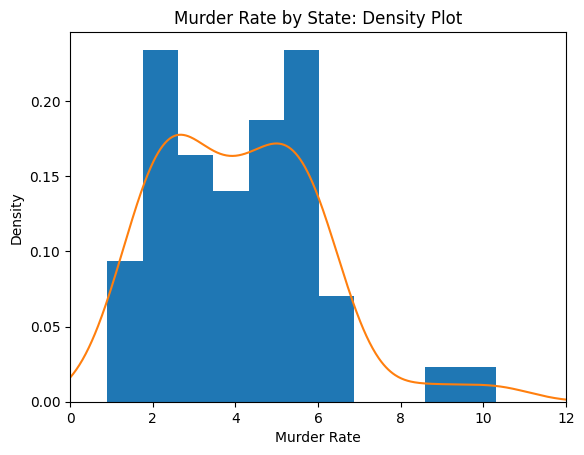

In [4]:
histogram = CRIME_RATE.hist(column="Murder.Rate", density=True, bins=11)
density_plot = CRIME_RATE["Murder.Rate"].plot.density()
histogram[0][0].set_title("Murder Rate by State: Density Plot")
histogram[0][0].set_xlabel("Murder Rate")
histogram[0][0].set_xlim((0,12))
display(density_plot)
display(CRIME_RATE["Murder.Rate"].describe())

# Categorical Data

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


<Axes: title={'center': 'Airport Delay Causes: Bar Chart'}, xlabel='Airport Delay Cause', ylabel='Count'>

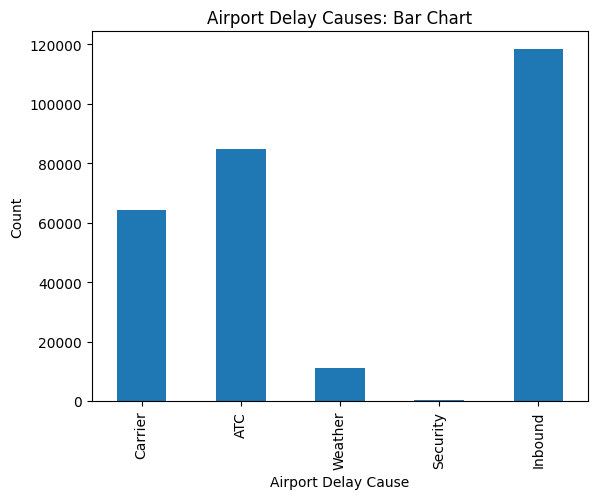

In [5]:
# categorical data
display(AIRPORT_DELAY_CAUSES)

# bar chart
bar_chart = AIRPORT_DELAY_CAUSES.transpose().plot.bar(legend=False)
bar_chart.set_title("Airport Delay Causes: Bar Chart")
bar_chart.set_xlabel("Airport Delay Cause")
bar_chart.set_ylabel("Count")
display(bar_chart)

A special type of categorical data is data in which the categories represent or can be mapped to discrete values on the same scale. A marketer for a new cloud technology, for example, offers two levels of service, one priced at $300/month and another at $50/month. The marketer offers free webinars to generate leads, and the firm figures that 5% of the attendees will sign up for the $300 service, 15% will sign up for the $50 service, and 80% will not sign up for anything. This data can be summed up, for financial purposes, in a single “expected value,” which is a form of weighted mean, in which the weights are probabilities. 

The expected value is calculated as follows:
```
1. Multiply each outcome by its probability of occurrence.
2. Sum these values.
```
In the cloud service example, the expected value of a webinar attendee is thus $22.50 per month, calculated as follows:
```
EV = 0 . 05 300 + 0 . 15 50 + 0 . 80 0 = 22 . 5
```

The expected value is really a form of weighted mean: it adds the ideas of future expectations and probability weights, often based on subjective judgment. Expected value is a fundamental concept in business valuation and capital budgeting.

# Corrolation

Variables X and Y (each with measured data) are said to be positively correlated if high values of X go with high values of Y, and low values of X go with low values of Y. If high values of X go with low values of Y, and vice versa, the variables are negatively correlated.

To compute Pearson’s correlation coefficient, we multiply deviations from the mean for variable 1 times those for variable 2, and divide by the product of the standard deviations. 

**The correlation coefficient always lies between +1 (perfect positive correlation) and –1 (perfect negative correlation); 0 indicates no correlation.**

Variables can have an association that is not linear, in which case the correlation coefficient may not be a useful metric. The relationship between tax rates and revenue raised is an example: as tax rates increase from zero, the revenue raised also increases. However, once tax rates reach a high level and approach 100%, tax avoidance increases and tax revenue actually declines.

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


<Axes: title={'center': 'SP500 ETF Stock Prices: Correlation Matrix Heatmap'}>

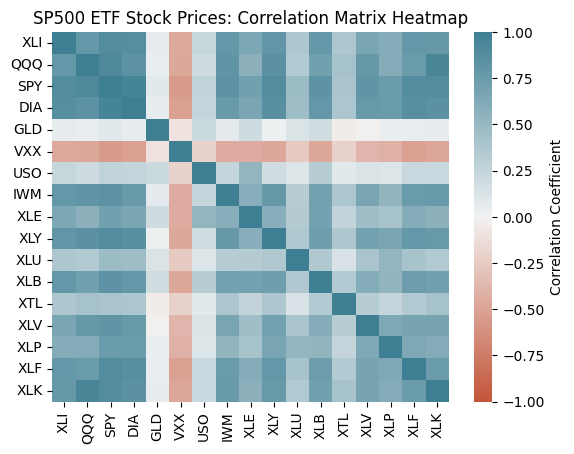

In [6]:
# Correlation matrix represented with a heatmap

display(SP500_DATA.head())
display(SP500_SECTORS.head())
etfs = SP500_DATA.loc[SP500_DATA.index > "2012-07-01", SP500_SECTORS[SP500_SECTORS["sector"] == "etf"]["symbol"]]
etf_corr_heatmap = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), cbar_kws={"label": "Correlation Coefficient"})
etf_corr_heatmap.set(title="SP500 ETF Stock Prices: Correlation Matrix Heatmap")
display(etf_corr_heatmap)

_The ETFs for the S&P 500 (SPY) and the Dow Jones Index (DIA) have a high correlation. Similarly, the QQQ and the XLK, composed mostly of technology companies, are positively correlated. Defensive ETFs, such as those tracking gold prices (GLD), oil prices (USO), or market volatility (VXX), tend to be weakly or negatively correlated with the other ETFs._

**Like the mean and standard deviation, the correlation coefficient is sensitive to outliers in the data. The methods in the scikit-learn module sklearn.covariance implement a variety of approaches.**

,T,CTL,FTR,VZ,LVLT
2012-07-02,0.422496,0.140847,0.070879,0.554180,-0.519998
2012-07-03,-0.177448,0.066280,0.070879,-0.025976,-0.049999
2012-07-05,-0.160548,-0.132563,0.055128,-0.051956,-0.180000
2012-07-06,0.342205,0.132563,0.007875,0.140106,-0.359999
2012-07-09,0.136883,0.124279,-0.023626,0.253943,0.180000


<Axes: title={'center': 'ATT & Verizon Correlation: Scatterplot'}, xlabel='ATT (T)', ylabel='Verizon (VZ)'>

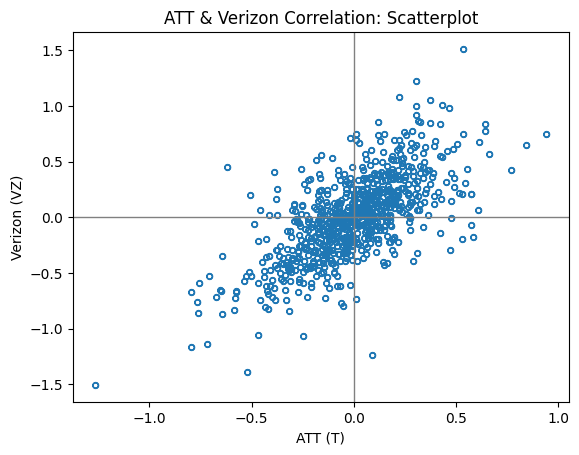

In [7]:
# Determine telecommunications symbols
telecomSymbols = SP500_SECTORS[SP500_SECTORS["sector"] == "telecommunications_services"]["symbol"]

# Filter data for dates July 2012 through June 2015
telecom = SP500_DATA.loc[SP500_DATA.index >= '2012-07-01', telecomSymbols]

display(telecom.head())

scatterplot = telecom.plot.scatter(x="T", y="VZ", marker="$\u25EF$")
scatterplot.set_title("ATT & Verizon Correlation: Scatterplot")
scatterplot.set_xlabel("ATT (T)")
scatterplot.set_ylabel("Verizon (VZ)")
scatterplot.axhline(0, color="grey", lw=1)
scatterplot.axvline(0, color="grey", lw=1)
display(scatterplot)

_The returns have a positive relationship: while they cluster around zero, on most days, the stocks go up or go down in tandem (upper-right and lower-left quadrants). There are fewer days where one stock goes down significantly while the other stock goes up, or vice versa (lower-right and upper-left quadrants)._

# Exploring 2 Or More Variables

### Hexagonal Binning Plot

The below figure is a hexagonal binning plot of the relationship between the finished square feet and the tax-assessed value for homes in King County. Rather than plotting points, which would appear as a monolithic dark cloud, we grouped the records into hexagonal bins and plotted the hexagons with a color indicating the number of records in that bin. In this chart, the positive relationship between square feet and tax-assessed value is clear. An interesting feature is the hint of additional bands above the main (darkest) band at the bottom, indicating homes that have the same square footage as those in the main band but a higher tax-assessed value.

,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0


<Axes: label='Count', title={'center': 'Relationship Between Tax-Assessed Value and Finished Square Feet of Properties in King County'}, xlabel='Finished Square Feet', ylabel='Tax-Assessed Value'>

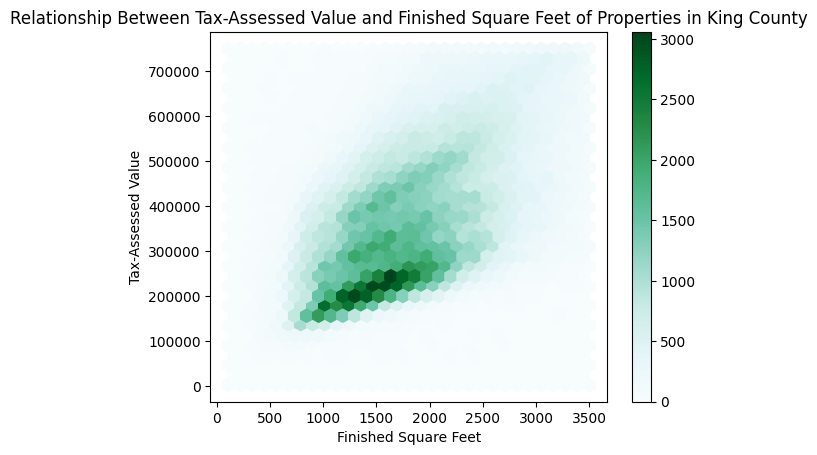

In [3]:
# filter dataset to remove very expensive and very small or large residences
filtered_kc_tax = KC_TAX.loc[(KC_TAX["TaxAssessedValue"] < 750000) & (KC_TAX["SqFtTotLiving"] > 100) & (KC_TAX["SqFtTotLiving"] < 3500), :]
display(filtered_kc_tax.head())

# hexbin plot
hexbin_plot = filtered_kc_tax.plot.hexbin(x="SqFtTotLiving", y="TaxAssessedValue", gridsize=30)
hexbin_plot.set_xlabel("Finished Square Feet")
hexbin_plot.set_ylabel("Tax-Assessed Value")
# IMPROVE: to set colorbar title, try using matplotlib
hexbin_plot.set_title("Relationship Between Tax-Assessed Value and Finished Square Feet of Properties in King County")
display(hexbin_plot)

### Contour Plot

Figure below uses contours overlaid onto a scatterplot to visualize the relationship between two numeric variables. The contours are essentially a topographical map to two variables; each contour band represents a specific density of points, increasing as one nears a “peak.” This plot shows a similar story as Figure 1-8: there is a secondary peak “north” of the main peak.

Text(0.5, 1.0, 'Relationship Between Tax-Assessed Value and Finished Square Feet of Properties in King County')

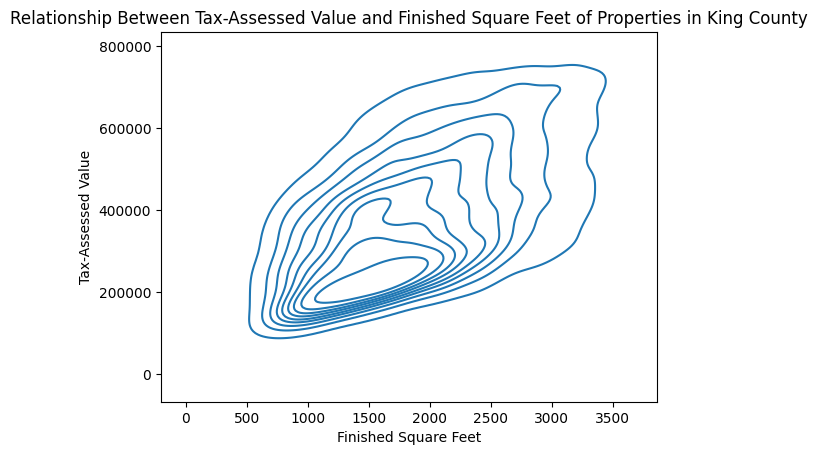

In [4]:
# contoured scatterplot
# NOTE: 5% sample data used here due to raw dataset being too large for jupyter to run
data_sample = filtered_kc_tax.sample(frac=0.05, random_state=1)
countoured_scatter_plot = sns.kdeplot(data=data_sample, x=data_sample.SqFtTotLiving, y=data_sample.TaxAssessedValue)
countoured_scatter_plot.set_xlabel("Finished Square Feet")
countoured_scatter_plot.set_ylabel("Tax-Assessed Value")
countoured_scatter_plot.set_title("Relationship Between Tax-Assessed Value and Finished Square Feet of Properties in King County")

### 2 Categorical Variables

A useful way to summarize two categorical variables is a contingency table—a table of counts by category. Table below shows the contingency table between the grade of a personal loan and the outcome of that loan. The grade goes from A (high) to G (low). The outcome is either fully paid, current, late, or charged off (the balance of the loan is not expected to be collected). This table shows the count and row percentages. High-grade loans have a very low late/charge-off percentage as compared with lower-grade loans.

Contingency tables can look only at counts, or they can also include column and total percentages.

**Pivot tables in Excel are perhaps the most common tool used to create contingency tables.**

In [38]:
# contingency table

# the margins keyword argument will add the column and row sums
pivot_table = LC_LOANS.pivot_table(index="grade", columns="status", aggfunc=lambda x: len(x), margins=True)

# create a copy of the pivot table, ignoring the column sums
filtered_pivot_table = pivot_table.loc["A":"G", :].copy()

# divide the rows with the row sum
filtered_pivot_table.loc[:,'Charged Off':'Late'] = filtered_pivot_table.loc[:,'Charged Off':'Late'].div(filtered_pivot_table['All'],
axis=0)

# divide the 'All' column by its sum
filtered_pivot_table["All"] = filtered_pivot_table['All'] / sum(filtered_pivot_table['All'])

display(filtered_pivot_table)

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


In [36]:
# another way to create a contingency (pivot) table
# NOTE: margins=True --> creates a "TOTAL" row + column, normalize="index"|"columns"|"all" divides values by total of either row|column|all to create percentages
not_normalized_pvtable = pd.crosstab(index=LC_LOANS["grade"], columns=LC_LOANS["status"], margins=True, margins_name="TOTAL").style.set_caption("NOT NORMALIZED")
index_normalized_pvtable = pd.crosstab(index=LC_LOANS["grade"], columns=LC_LOANS["status"], margins=True, margins_name="TOTAL", normalize="index").style.set_caption("INDEX NORMALIZED (each cell in row divided by row total)")
column_normalized_pvtable = pd.crosstab(index=LC_LOANS["grade"], columns=LC_LOANS["status"], margins=True, margins_name="TOTAL", normalize="columns").style.set_caption("COLUMNS NORMALIZED (each cell in column divided by column total)")
all_normalized_pvtable = pd.crosstab(index=LC_LOANS["grade"], columns=LC_LOANS["status"], margins=True, margins_name="TOTAL", normalize="all").style.set_caption("ALL NORMALIZED")

display(not_normalized_pvtable, index_normalized_pvtable, column_normalized_pvtable, all_normalized_pvtable)

status,Charged Off,Current,Fully Paid,Late,TOTAL
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
TOTAL,22671,321185,97316,9789,450961


status,Charged Off,Current,Fully Paid,Late
grade,,,,
A,0.021548,0.690454,0.281528,0.006470
B,0.040054,0.709013,0.235401,0.015532
C,0.049828,0.735702,0.191495,0.022974
D,0.067410,0.717328,0.184189,0.031073
E,0.081657,0.707936,0.170929,0.039478
F,0.118258,0.654371,0.180409,0.046962
G,0.126196,0.614008,0.198396,0.061401
TOTAL,0.050273,0.712223,0.215797,0.021707


status,Charged Off,Current,Fully Paid,Late,TOTAL
grade,,,,,
A,0.068899,0.155832,0.209709,0.047911,0.160746
B,0.233867,0.292205,0.320194,0.210032,0.293529
C,0.265670,0.276875,0.237854,0.283686,0.268039
D,0.220855,0.165889,0.140583,0.235775,0.164708
E,0.125358,0.076713,0.061131,0.140362,0.077177
F,0.067311,0.026290,0.023922,0.061906,0.028614
G,0.018041,0.006196,0.006607,0.020329,0.007187


status,Charged Off,Current,Fully Paid,Late,TOTAL
grade,,,,,
A,0.003464,0.110987,0.045254,0.001040,0.160746
B,0.011757,0.208116,0.069097,0.004559,0.293529
C,0.013356,0.197197,0.051328,0.006158,0.268039
D,0.011103,0.118150,0.030337,0.005118,0.164708
E,0.006302,0.054637,0.013192,0.003047,0.077177
F,0.003384,0.018724,0.005162,0.001344,0.028614
G,0.000907,0.004413,0.001426,0.000441,0.007187
TOTAL,0.050273,0.712223,0.215797,0.021707,1.000000


As predicted, the worse the grade of the personal loan - the larger the percentage of the loan being charged off or late.

### Categorical & Numeric Data

Boxplots (see “Percentiles and Boxplots” on page 20) are a simple way to visually compare the distributions of a numeric variable grouped according to a categorical variable. For example, we might want to compare how the percentage of flight delays varies across airlines. Below figure shows the percentage of flights in a month that were delayed where the delay was within the carrier’s control.

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


<Axes: title={'center': '% of Delayed Flights per Airline'}, xlabel='airline', ylabel='Daily % of Delayed Flights'>

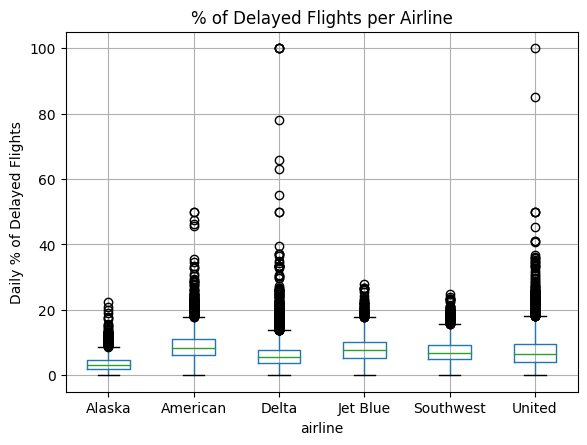

In [20]:
display(AIRLINE_STATS)
categorized_boxplot = AIRLINE_STATS.boxplot(by="airline", column="pct_carrier_delay")

# remove figure default "grouped by" title
categorized_boxplot.get_figure().suptitle("")

categorized_boxplot.set_title("% of Delayed Flights per Airline")
categorized_boxplot.set_ylabel("Daily % of Delayed Flights")

display(categorized_boxplot)

**Alaska stands out as having the fewest delays, while American has the most delays: the lower quartile for American is higher than the upper quartile for Alaska.**

A _violin plot_, introduced by [Hintze-Nelson-1998], is an enhancement to the boxplot and plots the density estimate with the density on the y-axis. The density is mirrored and flipped over, and the resulting shape is filled in, creating an image resembling a violin. The advantage of a violin plot is that it can show nuances in the distribution that aren’t perceptible in a boxplot. On the other hand, the boxplot more clearly shows the outliers in the data.

<Axes: title={'center': '% of Delayed Flights per Airline'}, xlabel='airline', ylabel='Daily % of Delayed Flights'>

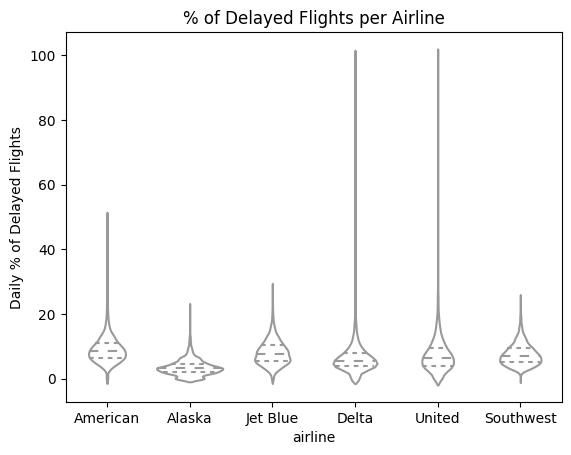

In [25]:
categorized_violin_plot = sns.violinplot(x=AIRLINE_STATS["airline"], y=AIRLINE_STATS["pct_carrier_delay"],
inner='quartile', color='white')

categorized_violin_plot.set_title("% of Delayed Flights per Airline")
categorized_violin_plot.set_ylabel('Daily % of Delayed Flights')

display(categorized_violin_plot)

**The violin plot shows a concentration in the distribution near zero for Alaska and, to a lesser extent, Delta. This phenomenon is not as obvious in the boxplot.**

# Visualizing Multiple Variables

The types of charts used to compare two variables—scatterplots, hexagonal binning, and boxplots—are readily extended to more variables through the notion of conditioning.

As an example, look back at the figure which showed the relationship between homes’ finished square feet and their tax-assessed values. We observed that there appears to be a cluster of homes that have higher tax-assessed value per square foot. Diving deeper, Figure below accounts for the effect of location by plotting the data for a set of zip codes. **Now the picture is much clearer: tax-assessed value is much higher in some zip codes (98105, 98126) than in others (98108, 98188).**

,TaxAssessedValue,SqFtTotLiving,ZipCode
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
10,202000.0,830,98108.0
11,210000.0,1130,98108.0
12,193000.0,1560,98108.0
...,...,...,...
498049,346000.0,1430,98105.0
498050,463000.0,1610,98105.0
498051,553000.0,1580,98105.0
498052,571000.0,1840,98105.0


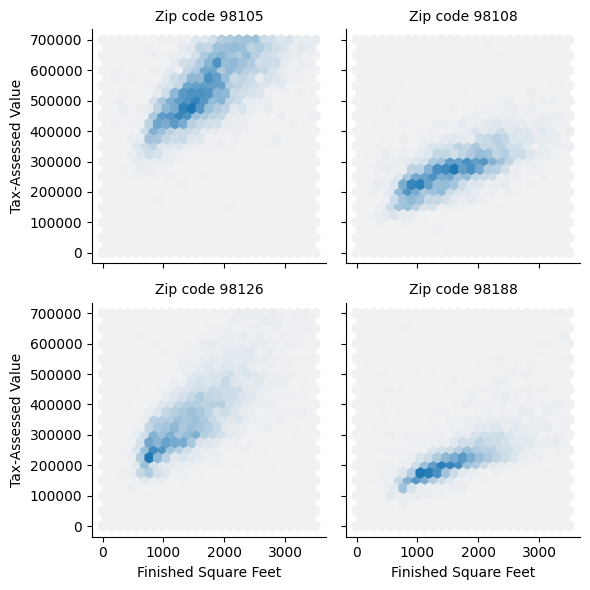

In [30]:
# conditioned (categorized) hexagonal binning plot

zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = KC_TAX.loc[KC_TAX.ZipCode.isin(zip_codes),:]


def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

# Use the arguments col and row to specify the conditioning variables.
# For a single conditioning variable, use col together with col_wrap to wrap the faceted graphs into multiple rows.
g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)

# The map method calls the hexbin function with subsets of the original data set for 
# the different zip codes. extent defines the limits of the x- and y-axes.
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', extent=[0, 3500, 0, 700000])

g.set_axis_labels('Finished Square Feet', 'Tax-Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

display(g)